In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

from lvmdrp.core.constants import LVM_UNAM_URL
from lvmdrp.utils.examples import fetch_example_data
from lvmdrp.core import rss, image, sky, spectrum1d
from lvmdrp.functions import skyMethod
from multiprocessing import Pool, cpu_count

plt.style.use("seaborn-v0_8-talk")

In [2]:
# define input data directory
data_path = os.path.abspath(os.path.join("..", "data"))

# let's create the output directory
output_path = "./data"
os.makedirs(output_path, exist_ok=True)

fetch_example_data(url=LVM_UNAM_URL, name="sim_1d", dest_path=data_path)

# define the target simulation
SIM_NAME = "DIG_bright_linear_full_900_{}.fits"
in_path = os.path.join(data_path, "sim_1d", SIM_NAME)
out_path = os.path.join(output_path, SIM_NAME)

[INFO]: example data already exists


In [3]:
skyMethod.createMasterSky_drp(
    in_rss=out_path.format("sci"),
    out_sky=out_path.format("msci")
)
skyMethod.createMasterSky_drp(
    in_rss=out_path.format("skyw"),
    out_sky=out_path.format("mskyw")
)
skyMethod.createMasterSky_drp(
    in_rss=out_path.format("skye"),
    out_sky=out_path.format("mskye")
)

[INFO]: preparing to create master 'sky' from './data/DIG_bright_linear_full_900_sci.fits'
[INFO]: calculating median value for each fiber
[INFO]: calculating sigma clipping with sigma = 3.0 within 1801 fibers
[INFO]: creating master (averaged) sky out of 1797
[INFO]: storing master sky in './data/DIG_bright_linear_full_900_msci.fits'
[INFO]: preparing to create master 'sky' from './data/DIG_bright_linear_full_900_skyw.fits'
[INFO]: calculating median value for each fiber
[INFO]: calculating sigma clipping with sigma = 3.0 within 59 fibers
[INFO]: creating master (averaged) sky out of 58
[INFO]: storing master sky in './data/DIG_bright_linear_full_900_mskyw.fits'
[INFO]: preparing to create master 'sky' from './data/DIG_bright_linear_full_900_skye.fits'
[INFO]: calculating median value for each fiber
[INFO]: calculating sigma clipping with sigma = 3.0 within 60 fibers
[INFO]: creating master (averaged) sky out of 49
[INFO]: storing master sky in './data/DIG_bright_linear_full_900_mskye

In [4]:
skyMethod.sepContinuumLine_drp(
    sky_ref=out_path.format("msci"),
    out_cont_line=out_path.format("sci_cl"),
    method="skycorr",
    sky_sci=out_path.format("msci")
)
skyMethod.sepContinuumLine_drp(
    sky_ref=out_path.format("mskyw"),
    out_cont_line=out_path.format("skyw_cl"),
    method="skycorr",
    sky_sci=out_path.format("msci")
)
skyMethod.sepContinuumLine_drp(
    sky_ref=out_path.format("mskye"),
    out_cont_line=out_path.format("skye_cl"),
    method="skycorr",
    sky_sci=out_path.format("msci")
)

[WARNING]: Keyword name 'ESO TEL ALT' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created. (VerifyWarning)
[ INFO  ] Skycorr 1.1.2
[ INFO  ] Using parameter file: /Users/amjones/repos/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_sci_cl.skycorr.par
[ INFO  ] Input science data file: /Users/amjones/repos/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_sci_cl.fits
[ INFO  ] Convert input science data file into /Users/amjones/repos/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_sci_cl_out_sci.fits
[ INFO  ] Read /Users/amjones/repos/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_sci_cl_out_sci.fits
[ INFO  ] Input sky data file: /Users/amjones/repos/lvmdrp/examples/sky_module/data/SKY_DIG_bright_linear_full_900_sci_cl.fits
[ INFO  ] Convert input sky data file into /Users/amjones/repos/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_sci_cl_out_sk

sh: wget: command not found
mv: /Users/amjones/miniconda3/envs/lvmdrp/lib/skycorr/sysdata/solflux_monthly_average.txt.1: No such file or directory


[ INFO  ] Get solar radio flux for 1/2022 from /Users/amjones/miniconda3/envs/lvmdrp/lib/skycorr/sysdata/solflux_monthly_average.txt
[WARNING] Solar radio fluxes until 4/2013 only
[ INFO  ] SOLFLUX = 125 sfu
[ INFO  ] Read line variability model file /Users/amjones/miniconda3/envs/lvmdrp/lib/skycorr/sysdata/airglow_var.dat
[ INFO  ] Adapt line list
[ INFO  ] Science spectrum:
[ INFO  ] Identify lines, estimate FWHM, and subtract continuum
[ INFO  ] Search for line threshold: FLUXLIM = 0.005
[ INFO  ] Sky spectrum:
[ INFO  ] Identify lines, estimate FWHM, and subtract continuum
[ INFO  ] Search for line threshold: FLUXLIM = 0.005
[ INFO  ] Derive line group weights for each pixel of the sky spectrum
[ INFO  ] Fitting ...
[ INFO  ] Input wavelength grid (no fit)
[ INFO  ] bestnorm: 0.000e+00
[ INFO  ] Chebyshev polynomial of degree 1
[ INFO  ] bestnorm: 9.978e-21
[ INFO  ] Chebyshev polynomial of degree 2
[ INFO  ] bestnorm: 9.985e-21
[ INFO  ] Chebyshev polynomial of degree 3
[ INFO  ] 

sh: gnuplot: command not found
sh: wget: command not found
mv: /Users/amjones/miniconda3/envs/lvmdrp/lib/skycorr/sysdata/solflux_monthly_average.txt.1: No such file or directory


[ INFO  ] Skycorr 1.1.2
[ INFO  ] Using parameter file: /Users/amjones/repos/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_skyw_cl.skycorr.par
[ INFO  ] Input science data file: /Users/amjones/repos/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_skyw_cl.fits
[ INFO  ] Convert input science data file into /Users/amjones/repos/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_skyw_cl_out_sci.fits
[ INFO  ] Read /Users/amjones/repos/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_skyw_cl_out_sci.fits
[ INFO  ] Input sky data file: /Users/amjones/repos/lvmdrp/examples/sky_module/data/SKY_DIG_bright_linear_full_900_skyw_cl.fits
[ INFO  ] Convert input sky data file into /Users/amjones/repos/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_skyw_cl_out_sky.fits
[ INFO  ] Read /Users/amjones/repos/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_skyw_cl_out_sky.fits
[ INFO  ] Take keywords from FITS extens

sh: gnuplot: command not found
sh: wget: command not found
mv: /Users/amjones/miniconda3/envs/lvmdrp/lib/skycorr/sysdata/solflux_monthly_average.txt.1: No such file or directory


[ INFO  ] Get solar radio flux for 1/2022 from /Users/amjones/miniconda3/envs/lvmdrp/lib/skycorr/sysdata/solflux_monthly_average.txt
[WARNING] Solar radio fluxes until 4/2013 only
[ INFO  ] SOLFLUX = 125 sfu
[ INFO  ] Read line variability model file /Users/amjones/miniconda3/envs/lvmdrp/lib/skycorr/sysdata/airglow_var.dat
[ INFO  ] Adapt line list
[ INFO  ] Science spectrum:
[ INFO  ] Identify lines, estimate FWHM, and subtract continuum
[ INFO  ] Search for line threshold: FLUXLIM = 0.005
[ INFO  ] Sky spectrum:
[ INFO  ] Identify lines, estimate FWHM, and subtract continuum
[ INFO  ] Search for line threshold: FLUXLIM = 0.005
[ INFO  ] Derive line group weights for each pixel of the sky spectrum
[ INFO  ] Fitting ...
[ INFO  ] Input wavelength grid (no fit)
[ INFO  ] bestnorm: 1.680e+03
[ INFO  ] Chebyshev polynomial of degree 1
[ INFO  ] bestnorm: 1.686e+03
[ INFO  ] Chebyshev polynomial of degree 2
[ INFO  ] bestnorm: 1.686e+03
[ INFO  ] Chebyshev polynomial of degree 3
[ INFO  ] 

sh: gnuplot: command not found


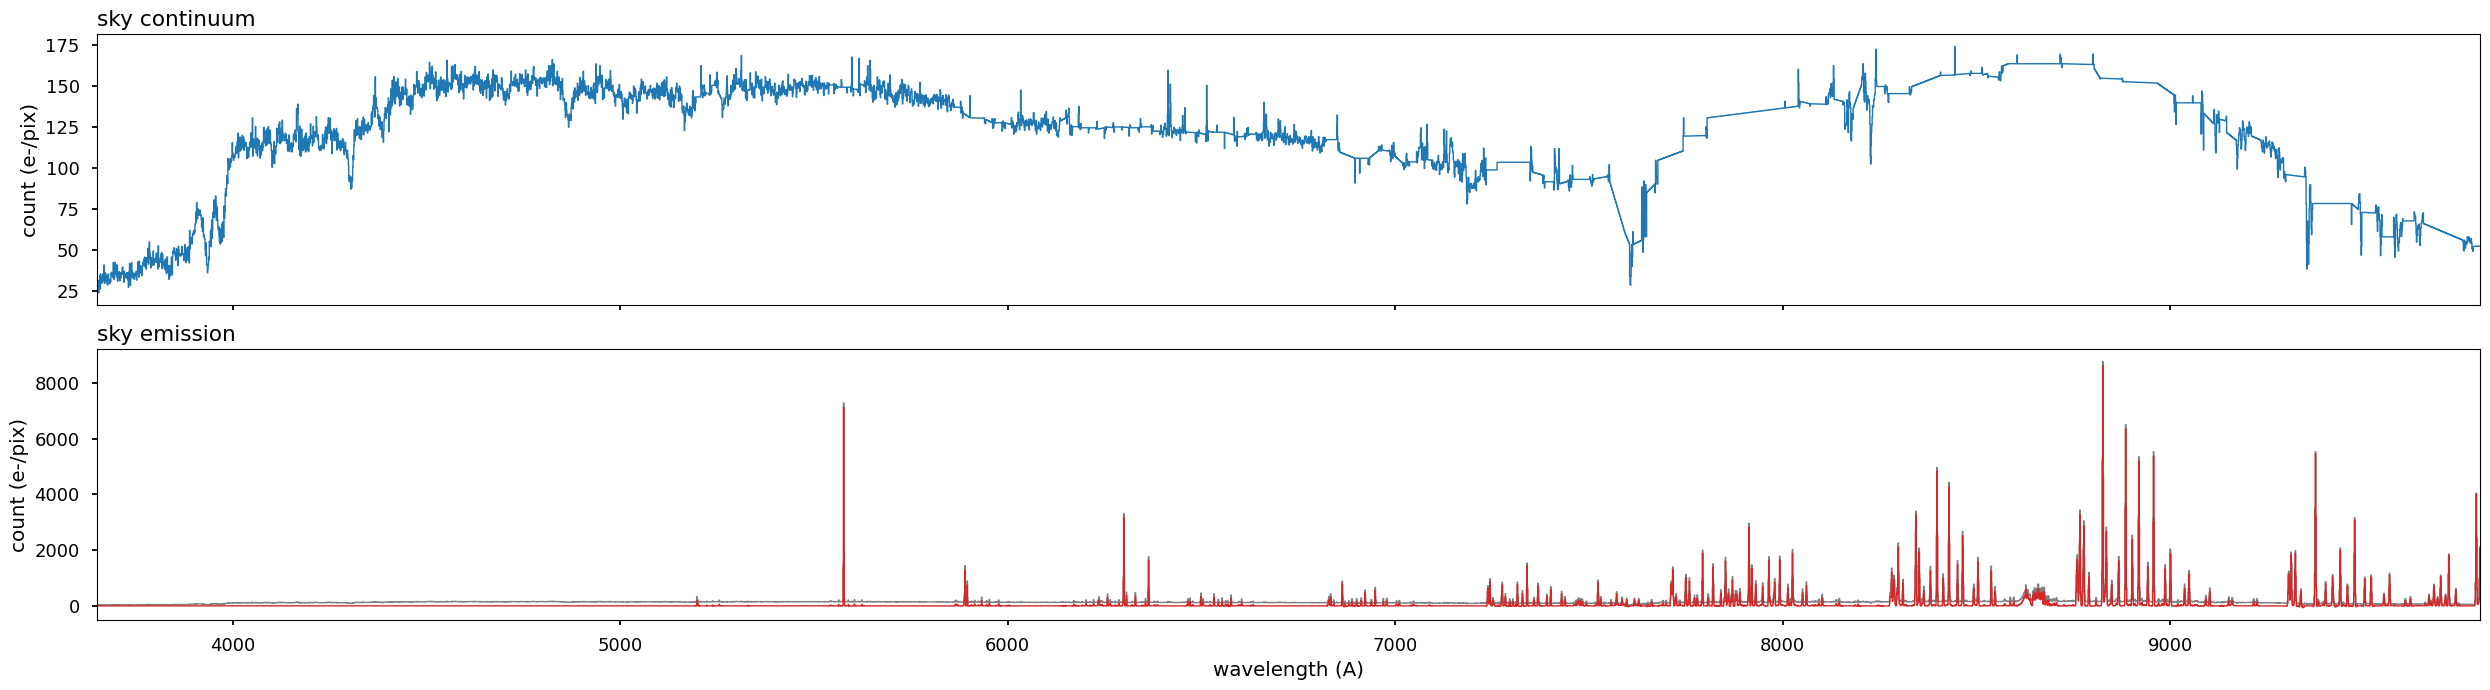

In [5]:
cont_line = rss.RSS()
cont_line.loadFitsData(out_path.format("skye_cl"))

skye = rss.RSS()
skye.loadFitsData(out_path.format("mskye"))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,7), sharex=True, sharey=False)
ax1.step(cont_line._wave, cont_line._data[0], lw=1, color="tab:blue")
ax2.step(skye._wave, skye._data, lw=1, color="0.5")
ax2.step(cont_line._wave, cont_line._data[1], lw=1, color="tab:red")
ax1.set_xlim(cont_line._wave.min(), cont_line._wave.max())
ax1.set_title("sky continuum", loc="left")
ax2.set_title("sky emission", loc="left")
ax1.set_ylabel("count (e-/pix)")
ax2.set_ylabel("count (e-/pix)")
ax2.set_xlabel("wavelength (A)")
fig.tight_layout()

In [6]:
skyMethod.evalESOSky_drp(
    sky_ref=out_path.format("msci"),
    out_rss=out_path.format("model_sci"),
    resample_method="linear", err_sim=50,
    parallel=0
)
skyMethod.evalESOSky_drp(
    sky_ref=out_path.format("mskyw"),
    out_rss=out_path.format("model_skyw"),
    resample_method="linear", err_sim=50,
    parallel=0
)
skyMethod.evalESOSky_drp(
    sky_ref=out_path.format("mskye"),
    out_rss=out_path.format("model_skye"),
    resample_method="linear", err_sim=50,
    parallel=0
)

[WARNING]: 'OBSERVAT' is not in reference sky header. Assuming OBSERVAT='LCO'
[WARNING]: 'OBSTIME' is not in reference sky header. Falling back to 'MJD'


OSError: cannot download https://ssd.jpl.nasa.gov/ftp/eph/planets/bsp//Users/amjones/repos/lvmdrp/python/lvmdrp/data/de421.bsp because HTTP Error 404: Not Found

In [ ]:
echo $EPH